<a href="https://colab.research.google.com/github/shaheer9023/Ai-Agent_201/blob/main/09__ImageGeneration_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
key=userdata.get('2.O_exp')

In [ ]:
!pip install langchain_google_genai -q

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

Making more than one prompt template

In [ ]:
from langchain import PromptTemplate

# ✅ First Prompt Template
first_prompt = PromptTemplate(
    input_variables=["question"],
    template="Change this '{question}' into a well-structured and detailed image generation prompt."
)

# ✅ Second Prompt Template
second_prompt = PromptTemplate(
    input_variables=["first_response"],
    template="Read this '{first_response}' and summarize it into a concise two-line prompt for image generation."
)



making LLM

In [ ]:
llm=ChatGoogleGenerativeAI(
    api_key=key,
    model="gemini-2.0-flash-exp",
    temperature=0.5,
    max_output_tokens=75, #we chose 75 tokens for better output because our model is limited to 77 tokens
)

making chains and connecting llm with both prompts

In [ ]:
first_chain=first_prompt | llm
second_chain=second_prompt|llm

In [ ]:
from IPython.display import display, Image

image generation model from hugging face using chatGPT

In [ ]:


from diffusers import StableDiffusionPipeline
import torch

write a image generation prompt image of BMW car
 first response : Okay, let's break down how to turn "image of BMW car" into a detailed and well-structured image generation prompt.  Here's a template and then examples with varying levels of detail:

**Template:**

```
[Image Type] of a [BMW Model] in [Color] on a [Background] with [Lighting and Atmosphere] and
Second response : Okay, I understand. You want me to take a basic request like "image of BMW car" and elaborate it into a detailed prompt following the template:

```
[Image Type] of a [BMW Model] in [Color] on a [Background] with [Lighting and Atmosphere]
```

And then summarize the detailed prompt into a concise two-line prompt


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['line prompt']


  0%|          | 0/50 [00:00<?, ?it/s]

first image 👇👇👇👇👇👇


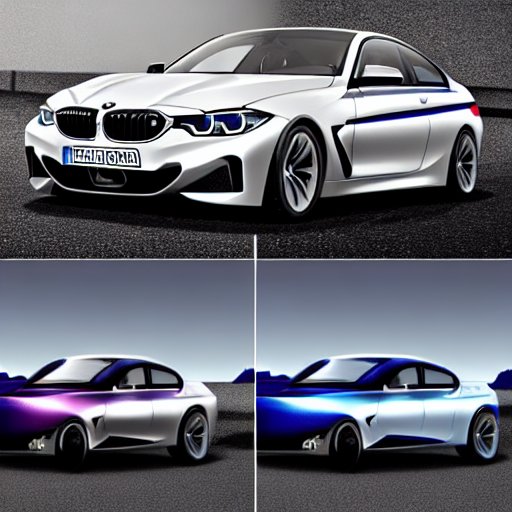

Second image 👇👇👇👇👇👇


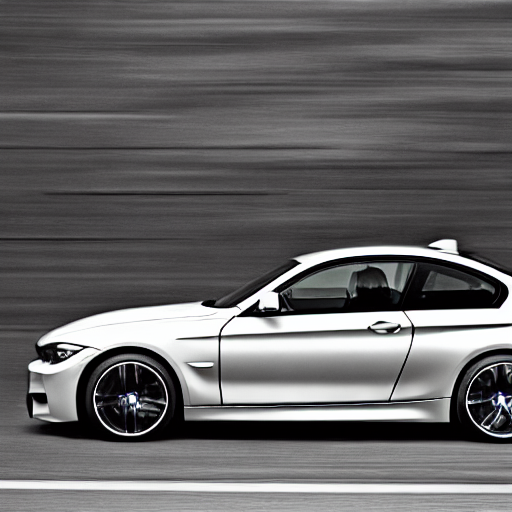

In [ ]:
first_response = first_chain.invoke({"question" : input("write a image generation prompt ")})
#first response
print(f" first response : {first_response.content}")


second_response = second_chain.invoke({"first_response" : first_response.content})
#second response
print(f"Second response : {second_response.content}")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image1 = pipe(first_response.content).images[0]
image2 = pipe(second_response.content).images[0]

# Save the generated image
image1.save("first_Image.png")
image2.save("second_Image.png")
print(f"first image 👇👇👇👇👇👇")
display(image1)
print(f"Second image 👇👇👇👇👇👇")
display(image2)
